# Task 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/life_expectancy_data.csv')

# Print a preview of the dataframe
df

Country  Year      Status  Life expectancy  Adult Mortality  \
0     Afghanistan  2015  Developing             65.0              263   
1     Afghanistan  2014  Developing             59.9              271   
2     Afghanistan  2013  Developing             59.9              268   
3     Afghanistan  2012  Developing             59.5              272   
4     Afghanistan  2011  Developing             59.2              275   
...           ...   ...         ...              ...              ...   
1644     Zimbabwe  2004  Developing             44.3              723   
1645     Zimbabwe  2003  Developing             44.5              715   
1646     Zimbabwe  2002  Developing             44.8               73   
1647     Zimbabwe  2001  Developing             45.3              686   
1648     Zimbabwe  2000  Developing             46.0              665   

      Infant Deaths  Alcohol  Percentage Expenditure  Hepatitis B  Measles  \
0                62     0.01               71.279624           65     1154   
1                64     0.01               73.523582           62      492   
2                66     0.01               73.219243           64      430   
3                69     0.01               78.184215           67     2787   
4                71     0.01                7.097109           68     3013   
...             ...      ...                     ...          ...      ...   
1644             27     4.36                0.000000           68       31   
1645             26     4.06                0.000000            7      998   
1646             25     4.43                0.000000           73      304   
1647             25     1.72                0.000000           76      529   
1648             24     1.68                0.000000           79     1483   

      ...  Polio  Total Expenditure  Diphtheria  HIV/AIDS         GDP  \
0     ...      6               8.16          65       0.1  584.259210   
1     ...     58               8.18          62       0.1  612.696514   
2     ...     62               8.13          64       0.1  631.744976   
3     ...     67               8.52          67       0.1  669.959000   
4     ...     68               7.87          68       0.1   63.537231   
...   ...    ...                ...         ...       ...         ...   
1644  ...     67               7.13          65      33.6  454.366654   
1645  ...      7               6.52          68      36.7  453.351155   
1646  ...     73               6.53          71      39.8   57.348340   
1647  ...     76               6.16          75      42.1  548.587312   
1648  ...     78               7.10          78      43.5  547.358878   

      Population  Thinness  1-19 years  Thinness 5-9 years  \
0     33736494.0                  17.2                17.3   
1       327582.0                  17.5                17.5   
2     31731688.0                  17.7                17.7   
3      3696958.0                  17.9                18.0   
4      2978599.0                  18.2                18.2   
...          ...                   ...                 ...   
1644  12777511.0                   9.4                 9.4   
1645  12633897.0                   9.8                 9.9   
1646    125525.0                   1.2                 1.3   
1647  12366165.0                   1.6                 1.7   
1648  12222251.0                  11.0                11.2   

      Income Composition of Resources  Schooling  
0                               0.479       10.1  
1                               0.476       10.0  
2                               0.470        9.9  
3                               0.463        9.8  
4                               0.454        9.5  
...                               ...        ...  
1644                            0.407        9.2  
1645                            0.418        9.5  
1646                            0.427       10.0  
1647                            0.427        9.8  
1648         

In [3]:
avg_adult_mortality = df.groupby('Country')['Adult Mortality'].mean().reset_index()
avg_adult_mortality.columns = ['Country', 'Average Adult Mortality']

avg_adult_mortality.head()

Country  Average Adult Mortality
0  Afghanistan               269.062500
1      Albania                45.062500
2      Algeria               102.818182
3       Angola               362.750000
4    Argentina               100.384615

In [4]:

avg_life_expectancy = df.groupby('Country')['Life expectancy'].mean().reset_index()
avg_life_expectancy.columns = ['Country', 'Average Life Expectancy']

avg_life_expectancy.head()

Country  Average Life Expectancy
0  Afghanistan                58.193750
1      Albania                75.156250
2      Algeria                74.209091
3       Angola                50.675000
4    Argentina                75.238462

In [5]:
avg_alcohol = df.groupby('Country')['Alcohol'].mean().reset_index();
avg_alcohol.columns = ['Country', 'Average Alcohol']

avg_alcohol.head()

Country  Average Alcohol
0  Afghanistan         0.014375
1      Albania         4.848750
2      Algeria         0.447273
3       Angola         7.620000
4    Argentina         8.004615

In [6]:
averages = pd.merge(avg_adult_mortality, avg_life_expectancy, on='Country')
averages = averages.merge(avg_alcohol, on='Country')

averages.head()

Country  Average Adult Mortality  Average Life Expectancy  \
0  Afghanistan               269.062500                58.193750   
1      Albania                45.062500                75.156250   
2      Algeria               102.818182                74.209091   
3       Angola               362.750000                50.675000   
4    Argentina               100.384615                75.238462   

   Average Alcohol  
0         0.014375  
1         4.848750  
2         0.447273  
3         7.620000  
4         8.004615

In [7]:
adult_morality_subest = avg_adult_mortality.sort_values(by='Average Adult Mortality', ascending=False)[:15]
adult_morality_subest

Country  Average Adult Mortality
68                    Lesotho               547.166667
132                  Zimbabwe               470.800000
16                   Botswana               460.933333
25   Central African Republic               444.833333
110              South Africa               418.400000
73                     Malawi               403.000000
131                    Zambia               370.000000
3                      Angola               362.750000
64                      Kenya               343.538462
91                    Nigeria               340.200000
114                 Swaziland               336.733333
108              Sierra Leone               335.250000
26                       Chad               322.142857
23                   Cameroon               305.500000
39                    Eritrea               294.400000

/var/folders/h8/0p2xkfkj2rs33vxvnxgk42x00000gn/T/ipykernel_37187/3144025777.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


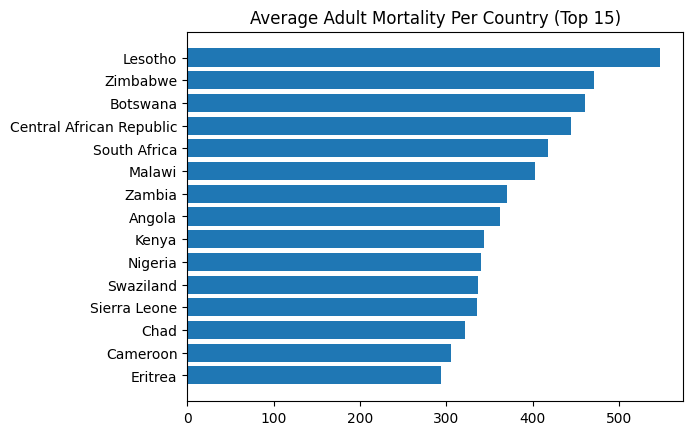

In [8]:
adult_morality_subest = avg_adult_mortality.sort_values(by='Average Adult Mortality', ascending=False)[:15]

fig, ax = plt.subplots()

ax.barh(adult_morality_subest['Country'], adult_morality_subest['Average Adult Mortality'])
ax.set_title('Average Adult Mortality Per Country (Top 15)')
ax.invert_yaxis()

fig.show()

/var/folders/h8/0p2xkfkj2rs33vxvnxgk42x00000gn/T/ipykernel_37187/2618873153.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


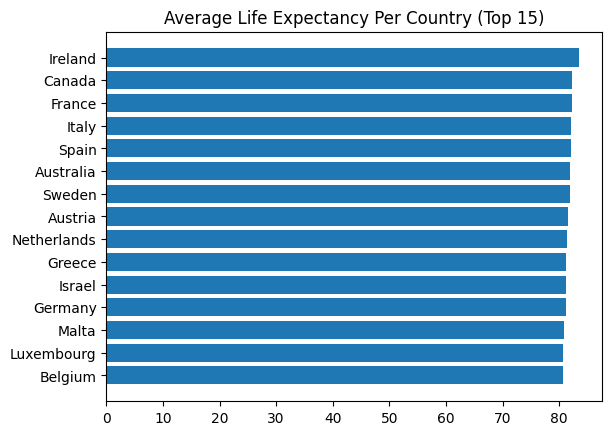

In [9]:
average_life_expectancy_subset = avg_life_expectancy.sort_values(by='Average Life Expectancy', ascending=False)[:15]

fig, ax = plt.subplots()

ax.barh(average_life_expectancy_subset['Country'], average_life_expectancy_subset['Average Life Expectancy'], )
ax.set_title('Average Life Expectancy Per Country (Top 15)')
ax.invert_yaxis()

fig.show()

/var/folders/h8/0p2xkfkj2rs33vxvnxgk42x00000gn/T/ipykernel_37187/3857136188.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


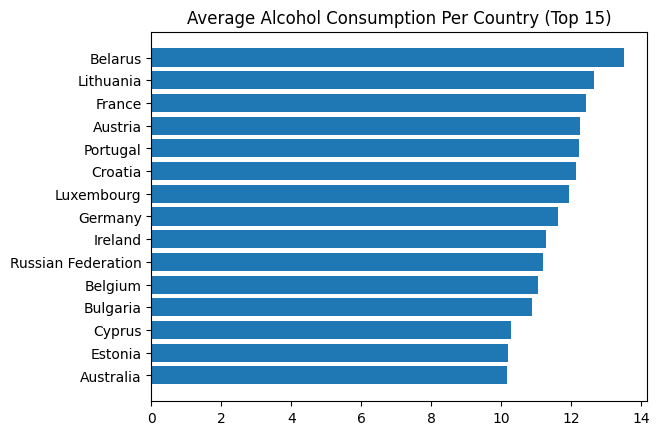

In [10]:
average_alcohol_subset = avg_alcohol.sort_values(by='Average Alcohol', ascending=False)[:15]

fig, ax = plt.subplots()

ax.barh(average_alcohol_subset['Country'], average_alcohol_subset['Average Alcohol'], )
ax.set_title('Average Alcohol Consumption Per Country (Top 15)')
ax.invert_yaxis()

fig.show()

/var/folders/h8/0p2xkfkj2rs33vxvnxgk42x00000gn/T/ipykernel_37187/919559636.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


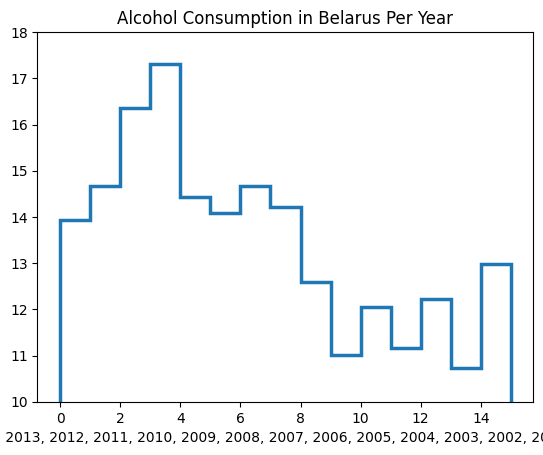

In [11]:
alcohol_in_belarus_per_year = df[df['Country'] == 'Belarus']

x_data = alcohol_in_belarus_per_year['Year']
y_data = alcohol_in_belarus_per_year['Alcohol']

fig, ax = plt.subplots()

ax.stairs(y_data, linewidth=2.5)
ax.set_title('Alcohol Consumption in Belarus Per Year')
ax.set_ylim(10, 18)
ax.set_xlabel(x_data.tolist())

fig.show()